In [1]:
import pandas as pd
import seaborn as sns

The input consists in 60 features and we have a total of 355 entries

In [2]:
X = pd.read_csv('x.csv')
print(X.head())
print(X.shape)

       AA_0        AA_1         AA_2         AA_3      AA_4        AA_5  \
0 -0.172409    7.667924 -1220.791304 -4840.323841 -3.594498   26.631613   
1 -6.518054  170.704308   423.294162  -434.068272 -1.878524   13.100269   
2 -0.136293    6.993067  2477.870447 -8385.579930  6.689322   30.528608   
3  2.712016   14.120212 -6911.504584 -8078.546083 -4.870796  137.317839   
4 -0.093258   32.958313 -6418.941496 -1436.092921 -0.182052    7.942547   

          AA_6         AA_7      AA_8       AA_9  ...     BB_16     AA_min  \
0  4398.225000  4498.513705 -1.573383  31.851562  ...  0.940441 -14.240520   
1 -2513.273963 -3758.839135 -0.159738   7.387870  ...  0.938525 -11.362966   
2 -7526.167337  -146.073301 -0.862950  86.084658  ...  0.943649 -14.454794   
3  -390.049552  3443.994469  3.965135  28.919154  ...  0.934364  -9.931874   
4 -3734.477809  2064.468355 -1.225585  76.101379  ...  0.942109 -12.536374   

     AA_max    AB_min    AB_max    BB_min    BB_max    T  rho  model  
0  0.4894

We want to predict 27 floating point outputs from the input data

In [3]:
y = pd.read_csv('y.csv')
print(y.head())
print(y.shape)

     w_AA_0   t0_AA_0    a_AA_0    b_AA_0        w_AA_1   t0_AA_1    a_AA_1  \
0  0.228322  0.124018 -2.819082  2.334874  2.443147e-05  0.749883 -0.879182   
1  0.204227  0.120999 -3.850469  2.939569  1.449764e-07  0.463015 -0.766732   
2  0.165903  0.153179 -2.601448  4.541583  7.195028e-05  0.208255 -0.888788   
3  0.214907  0.126567 -3.057595  2.388040  5.227315e-05  0.702713 -0.798578   
4  0.184886  0.131262 -3.722373  2.427054  2.896326e-04  0.586674 -1.014061   

     b_AA_1      c_AA        w_AB_0  ...      c_AB    w_BB_0   t0_BB_0  \
0  0.615354 -0.356599  1.563313e-05  ...  0.090925  0.053514  0.180889   
1  0.126668 -0.093676  4.130925e-08  ... -1.502683  0.008121  0.247915   
2  0.325474 -0.439259  8.650406e-06  ... -1.343909  0.000134  1.092953   
3  0.295806 -0.342688  9.238257e-07  ...  0.120454  0.051447  0.187341   
4  0.549101 -0.311859  4.344589e-06  ...  0.096659  0.038565  0.200575   

     a_BB_0    b_BB_0        w_BB_1   t0_BB_1    a_BB_1    b_BB_1      c_BB  
0 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [5]:
import sklearn.preprocessing
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

In [6]:
feature_names = X.columns[1:]
print(feature_names)
output_names = y.columns[1:]
print(output_names)

Index(['AA_1', 'AA_2', 'AA_3', 'AA_4', 'AA_5', 'AA_6', 'AA_7', 'AA_8', 'AA_9',
       'AA_10', 'AA_11', 'AA_12', 'AA_13', 'AA_14', 'AA_15', 'AA_16', 'AB_0',
       'AB_1', 'AB_2', 'AB_3', 'AB_4', 'AB_5', 'AB_6', 'AB_7', 'AB_8', 'AB_9',
       'AB_10', 'AB_11', 'AB_12', 'AB_13', 'AB_14', 'AB_15', 'AB_16', 'BB_0',
       'BB_1', 'BB_2', 'BB_3', 'BB_4', 'BB_5', 'BB_6', 'BB_7', 'BB_8', 'BB_9',
       'BB_10', 'BB_11', 'BB_12', 'BB_13', 'BB_14', 'BB_15', 'BB_16', 'AA_min',
       'AA_max', 'AB_min', 'AB_max', 'BB_min', 'BB_max', 'T', 'rho', 'model'],
      dtype='object')
Index(['t0_AA_0', 'a_AA_0', 'b_AA_0', 'w_AA_1', 't0_AA_1', 'a_AA_1', 'b_AA_1',
       'c_AA', 'w_AB_0', 't0_AB_0', 'a_AB_0', 'b_AB_0', 'w_AB_1', 't0_AB_1',
       'a_AB_1', 'b_AB_1', 'c_AB', 'w_BB_0', 't0_BB_0', 'a_BB_0', 'b_BB_0',
       'w_BB_1', 't0_BB_1', 'a_BB_1', 'b_BB_1', 'c_BB'],
      dtype='object')


In [7]:
X_train_scaled = X_train.copy()
X_train_scaled[feature_names] = min_max_scaler.fit_transform(X_train[feature_names])
X_train_scaled.describe()

,AA_0,AA_1,AA_2,AA_3,AA_4,AA_5,AA_6,AA_7,AA_8,AA_9,...,BB_16,AA_min,AA_max,AB_min,AB_max,BB_min,BB_max,T,rho,model
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,18.098361,0.016860,0.499940,0.508982,0.527043,0.107893,0.482583,0.505710,0.737242,0.172327,...,0.642973,0.696916,0.512851,0.621600,0.392591,0.554542,0.430080,0.176278,0.528169,0.478873
std,171.284916,0.064559,0.272656,0.269161,0.056506,0.140275,0.266214,0.269470,0.059337,0.230219,...,0.200354,0.169832,0.239524,0.216419,0.236833,0.185355,0.353242,0.192650,0.397762,0.500435
min,-929.851921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.782278,0.002921,0.250466,0.272647,0.524377,0.010802,0.272665,0.303352,0.742157,0.042538,...,0.581618,0.613180,0.353665,0.491559,0.233416,0.464111,0.054865,0.059067,0.000000,0.000000
50%,0.081263,0.006490,0.497855,0.520427,0.524838,0.050072,0.483961,0.493809,0.742618,0.084803,...,0.682798,0.717894,0.497455,0.672465,0.349684,0.565392,0.409365,0.129534,0.500000,0.000000
75%,2.159065,0.009691,0.718075,0.737534,0.525316,0.142618,0.703298,0.730145,0.743127,0.176202,...,0.778609,0.812441,0.631886,0.771009,0.540284,0.692229,0.885897,0.213731,1.000000,1.000000
max,1786.402041,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X_test_scaled = X_test.copy()
X_test_scaled[feature_names] = min_max_scaler.fit_transform(X_test[feature_names])

y_test_scaled = y_test.copy()
y_test_scaled[output_names] = min_max_scaler.fit_transform(y_test[output_names])

y_train_scaled = y_train.copy()
y_train_scaled[output_names] = min_max_scaler.fit_transform(y_train[output_names])

In [9]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='lbfgs', alpha=0.001, batch_size='auto',
                     learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=100000, 
                     shuffle=True, random_state=666, tol=0.0001, verbose=True, warm_start=False, 
                     momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                     beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=150000)






In [10]:
#from sklearn.model_selection import GridSearchCV
#parameter_space = {
#    #'activation': ['tanh', 'relu'],
#    'alpha': [0.0001, 0.001, 0.05],
#    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,),
#                           (100, 100), (100, 100, 100), (50,)],
#    'n_iter_no_change': [10, 100, 1000],
#    'solver': ['sgd', 'adam', 'lbfgs'],
#    'tol': [10**-3,10 ** -4, 10 ** -5],
#}
#print("Creating GridSearchCV object")
#model = GridSearchCV(model, parameter_space, n_jobs=4, cv=3)
#print("Starting Grid Search (WARNING: this may take a VERY long time)")
#model.fit(X_train_scaled,y_train_scaled)
#print("Finished Grid Search")

# Best parameter set
#print('Best parameters found:\n', clf.best_params_)


In [11]:
# I have found the best parameters using the grid search above
# here they are:
model = MLPRegressor(hidden_layer_sizes=(80,80), activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
                     learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000000, 
                     shuffle=True, random_state=666, tol=1e-8, verbose=True, warm_start=False, 
                     momentum=0.9, nesterovs_momentum=True, early_stopping=True, 
                     beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=1000, max_fun=150000)

In [12]:
model.fit(X_train_scaled,y_train_scaled)

Iteration 1, loss = 100.51615121
Validation score: -1853.453536
Iteration 2, loss = 75.47904047
Validation score: -1382.548602
Iteration 3, loss = 56.54738763
Validation score: -1069.500897
Iteration 4, loss = 41.87907261
Validation score: -859.634234
Iteration 5, loss = 31.98078401
Validation score: -704.124681
Iteration 6, loss = 24.41812996
Validation score: -574.640586
Iteration 7, loss = 18.30140178
Validation score: -468.229871
Iteration 8, loss = 13.88391436
Validation score: -375.271480
Iteration 9, loss = 9.22342900
Validation score: -289.788743
Iteration 10, loss = 7.19359661
Validation score: -203.116108
Iteration 11, loss = 5.12861310
Validation score: -142.305877
Iteration 12, loss = 3.57515944
Validation score: -101.811101
Iteration 13, loss = 2.36113857
Validation score: -73.108239
Iteration 14, loss = 1.85540104
Validation score: -50.556817
Iteration 15, loss = 1.26012441
Validation score: -35.602473
Iteration 16, loss = 0.86762169
Validation score: -24.640146
Iteration

Iteration 141, loss = 0.01560681
Validation score: -0.533096
Iteration 142, loss = 0.01517187
Validation score: -0.517519
Iteration 143, loss = 0.01954705
Validation score: -0.528328
Iteration 144, loss = 0.01714519
Validation score: -0.602379
Iteration 145, loss = 0.01711500
Validation score: -0.532170
Iteration 146, loss = 0.01442421
Validation score: -0.510710
Iteration 147, loss = 0.01750934
Validation score: -0.498069
Iteration 148, loss = 0.01824958
Validation score: -0.490397
Iteration 149, loss = 0.01424287
Validation score: -0.568899
Iteration 150, loss = 0.01605729
Validation score: -0.560336
Iteration 151, loss = 0.01489042
Validation score: -0.483131
Iteration 152, loss = 0.01561391
Validation score: -0.473653
Iteration 153, loss = 0.01646352
Validation score: -0.492087
Iteration 154, loss = 0.01411000
Validation score: -0.565575
Iteration 155, loss = 0.01520841
Validation score: -0.516379
Iteration 156, loss = 0.01518080
Validation score: -0.463990
Iteration 157, loss = 0.

Validation score: -0.355865
Iteration 284, loss = 0.01258619
Validation score: -0.341202
Iteration 285, loss = 0.01212466
Validation score: -0.310524
Iteration 286, loss = 0.01245987
Validation score: -0.307174
Iteration 287, loss = 0.01262370
Validation score: -0.320627
Iteration 288, loss = 0.01211299
Validation score: -0.329209
Iteration 289, loss = 0.01209719
Validation score: -0.313019
Iteration 290, loss = 0.01226927
Validation score: -0.307216
Iteration 291, loss = 0.01221634
Validation score: -0.303040
Iteration 292, loss = 0.01278441
Validation score: -0.306796
Iteration 293, loss = 0.01307066
Validation score: -0.333543
Iteration 294, loss = 0.01244969
Validation score: -0.333461
Iteration 295, loss = 0.01207344
Validation score: -0.327459
Iteration 296, loss = 0.01302545
Validation score: -0.307245
Iteration 297, loss = 0.01253433
Validation score: -0.305997
Iteration 298, loss = 0.01207225
Validation score: -0.308674
Iteration 299, loss = 0.01451991
Validation score: -0.302

Iteration 436, loss = 0.05828946
Validation score: -0.301750
Iteration 437, loss = 0.01826610
Validation score: -0.303797
Iteration 438, loss = 0.03440598
Validation score: -0.310300
Iteration 439, loss = 0.01959799
Validation score: -0.377057
Iteration 440, loss = 0.01601094
Validation score: -0.326408
Iteration 441, loss = 0.03869669
Validation score: -0.332932
Iteration 442, loss = 0.02163413
Validation score: -0.334142
Iteration 443, loss = 0.02935063
Validation score: -0.361188
Iteration 444, loss = 0.02601879
Validation score: -0.400861
Iteration 445, loss = 0.01673718
Validation score: -0.324178
Iteration 446, loss = 0.01589393
Validation score: -0.299874
Iteration 447, loss = 0.02126342
Validation score: -0.313717
Iteration 448, loss = 0.02027442
Validation score: -0.315721
Iteration 449, loss = 0.01510532
Validation score: -0.309057
Iteration 450, loss = 0.01203138
Validation score: -0.321925
Iteration 451, loss = 0.01188255
Validation score: -0.335575
Iteration 452, loss = 0.

Iteration 572, loss = 0.03222566
Validation score: -0.929667
Iteration 573, loss = 0.03315910
Validation score: -0.582674
Iteration 574, loss = 0.02416041
Validation score: -0.670055
Iteration 575, loss = 0.02221651
Validation score: -0.749687
Iteration 576, loss = 0.02138226
Validation score: -0.543531
Iteration 577, loss = 0.01773816
Validation score: -0.415075
Iteration 578, loss = 0.01469380
Validation score: -0.341837
Iteration 579, loss = 0.01996426
Validation score: -0.400751
Iteration 580, loss = 0.02228137
Validation score: -0.460111
Iteration 581, loss = 0.01672066
Validation score: -0.326795
Iteration 582, loss = 0.01197657
Validation score: -0.346146
Iteration 583, loss = 0.01722023
Validation score: -0.337247
Iteration 584, loss = 0.01482767
Validation score: -0.365071
Iteration 585, loss = 0.01213889
Validation score: -0.424366
Iteration 586, loss = 0.01489918
Validation score: -0.352299
Iteration 587, loss = 0.01320538
Validation score: -0.295327
Iteration 588, loss = 0.

Iteration 715, loss = 0.02919093
Validation score: -0.316436
Iteration 716, loss = 0.01581603
Validation score: -0.317376
Iteration 717, loss = 0.01832248
Validation score: -0.272104
Iteration 718, loss = 0.01407179
Validation score: -0.277360
Iteration 719, loss = 0.01161624
Validation score: -0.312147
Iteration 720, loss = 0.01332398
Validation score: -0.313524
Iteration 721, loss = 0.01240643
Validation score: -0.298949
Iteration 722, loss = 0.01036964
Validation score: -0.294050
Iteration 723, loss = 0.01117586
Validation score: -0.299387
Iteration 724, loss = 0.01114672
Validation score: -0.287416
Iteration 725, loss = 0.01020246
Validation score: -0.294242
Iteration 726, loss = 0.01054318
Validation score: -0.273752
Iteration 727, loss = 0.01041972
Validation score: -0.273902
Iteration 728, loss = 0.01008063
Validation score: -0.323359
Iteration 729, loss = 0.01069006
Validation score: -0.270515
Iteration 730, loss = 0.01154212
Validation score: -0.286860
Iteration 731, loss = 0.

Iteration 852, loss = 0.00905815
Validation score: -0.348811
Iteration 853, loss = 0.01096350
Validation score: -0.350483
Iteration 854, loss = 0.00975219
Validation score: -0.326181
Iteration 855, loss = 0.00904504
Validation score: -0.365503
Iteration 856, loss = 0.00966331
Validation score: -0.368756
Iteration 857, loss = 0.00947945
Validation score: -0.312813
Iteration 858, loss = 0.00885254
Validation score: -0.338169
Iteration 859, loss = 0.00902282
Validation score: -0.315585
Iteration 860, loss = 0.00870169
Validation score: -0.335530
Iteration 861, loss = 0.00917000
Validation score: -0.353329
Iteration 862, loss = 0.00916670
Validation score: -0.328509
Iteration 863, loss = 0.00868737
Validation score: -0.383356
Iteration 864, loss = 0.00927584
Validation score: -0.360911
Iteration 865, loss = 0.00921593
Validation score: -0.307645
Iteration 866, loss = 0.00883883
Validation score: -0.317983
Iteration 867, loss = 0.00882472
Validation score: -0.336680
Iteration 868, loss = 0.

Iteration 993, loss = 0.06942213
Validation score: -0.447119
Iteration 994, loss = 0.03250360
Validation score: -1.549123
Iteration 995, loss = 0.05835912
Validation score: -0.469656
Iteration 996, loss = 0.03049582
Validation score: -3.451093
Iteration 997, loss = 0.10416353
Validation score: -0.729457
Iteration 998, loss = 0.02284200
Validation score: -5.644765
Iteration 999, loss = 0.19379703
Validation score: -4.415393
Iteration 1000, loss = 0.11531444
Validation score: -1.813999
Iteration 1001, loss = 0.24770547
Validation score: -22.629229
Iteration 1002, loss = 0.63303621
Validation score: -5.109714
Iteration 1003, loss = 0.44221977
Validation score: -6.440005
Iteration 1004, loss = 0.22495278
Validation score: -13.549585
Iteration 1005, loss = 0.57938214
Validation score: -1.647245
Iteration 1006, loss = 0.20746617
Validation score: -9.950597
Iteration 1007, loss = 0.32005794
Validation score: -9.849890
Iteration 1008, loss = 0.33423177
Validation score: -3.060453
Iteration 100

Iteration 1135, loss = 0.00777693
Validation score: -0.380381
Iteration 1136, loss = 0.00775458
Validation score: -0.381540
Iteration 1137, loss = 0.00776031
Validation score: -0.379923
Iteration 1138, loss = 0.00774966
Validation score: -0.379518
Iteration 1139, loss = 0.00778565
Validation score: -0.375492
Iteration 1140, loss = 0.00776662
Validation score: -0.369534
Iteration 1141, loss = 0.00773241
Validation score: -0.370937
Iteration 1142, loss = 0.00774172
Validation score: -0.376316
Iteration 1143, loss = 0.00772313
Validation score: -0.379463
Iteration 1144, loss = 0.00774762
Validation score: -0.373111
Iteration 1145, loss = 0.00771446
Validation score: -0.369138
Iteration 1146, loss = 0.00787117
Validation score: -0.370245
Iteration 1147, loss = 0.00775725
Validation score: -0.375458
Iteration 1148, loss = 0.00775024
Validation score: -0.371688
Iteration 1149, loss = 0.00773482
Validation score: -0.360305
Iteration 1150, loss = 0.00775247
Validation score: -0.361585
Iteratio

Iteration 1288, loss = 0.00765108
Validation score: -0.401173
Iteration 1289, loss = 0.00741325
Validation score: -0.398345
Iteration 1290, loss = 0.00780688
Validation score: -0.395122
Iteration 1291, loss = 0.00743413
Validation score: -0.378000
Iteration 1292, loss = 0.00783392
Validation score: -0.379258
Iteration 1293, loss = 0.00885411
Validation score: -0.374878
Iteration 1294, loss = 0.00767567
Validation score: -0.394689
Iteration 1295, loss = 0.00758987
Validation score: -0.400012
Iteration 1296, loss = 0.00918013
Validation score: -0.387950
Iteration 1297, loss = 0.00914610
Validation score: -0.401168
Iteration 1298, loss = 0.00799566
Validation score: -0.389718
Iteration 1299, loss = 0.00766794
Validation score: -0.377782
Iteration 1300, loss = 0.00874044
Validation score: -0.393199
Iteration 1301, loss = 0.00819991
Validation score: -0.378685
Iteration 1302, loss = 0.00795900
Validation score: -0.419553
Iteration 1303, loss = 0.00903716
Validation score: -0.414817
Iteratio

Validation score: -1.953134
Iteration 1422, loss = 0.04890237
Validation score: -7.729849
Iteration 1423, loss = 0.16104432
Validation score: -0.432913
Iteration 1424, loss = 0.06175164
Validation score: -7.568161
Iteration 1425, loss = 0.16522578
Validation score: -1.252800
Iteration 1426, loss = 0.02726699
Validation score: -2.486501
Iteration 1427, loss = 0.05541644
Validation score: -4.392256
Iteration 1428, loss = 0.09025815
Validation score: -0.683824
Iteration 1429, loss = 0.01807471
Validation score: -1.947394
Iteration 1430, loss = 0.04814031
Validation score: -0.755413
Iteration 1431, loss = 0.01631719
Validation score: -2.079633
Iteration 1432, loss = 0.08759880
Validation score: -0.475964
Iteration 1433, loss = 0.01220838
Validation score: -8.951385
Iteration 1434, loss = 0.20499683
Validation score: -8.181297
Iteration 1435, loss = 0.17969989
Validation score: -0.588375
Iteration 1436, loss = 0.02157168
Validation score: -2.360379
Iteration 1437, loss = 0.07473150
Validati

Validation score: -0.397650
Iteration 1557, loss = 0.00672581
Validation score: -0.393386
Iteration 1558, loss = 0.00677108
Validation score: -0.391723
Iteration 1559, loss = 0.00667877
Validation score: -0.399144
Iteration 1560, loss = 0.00669300
Validation score: -0.406840
Iteration 1561, loss = 0.00665968
Validation score: -0.411575
Iteration 1562, loss = 0.00670890
Validation score: -0.405136
Iteration 1563, loss = 0.00673395
Validation score: -0.392729
Iteration 1564, loss = 0.00667474
Validation score: -0.399190
Iteration 1565, loss = 0.00673146
Validation score: -0.407898
Iteration 1566, loss = 0.00663217
Validation score: -0.411310
Iteration 1567, loss = 0.00669937
Validation score: -0.401676
Iteration 1568, loss = 0.00673420
Validation score: -0.392810
Iteration 1569, loss = 0.00665276
Validation score: -0.395393
Iteration 1570, loss = 0.00662652
Validation score: -0.403973
Iteration 1571, loss = 0.00672002
Validation score: -0.394930
Iteration 1572, loss = 0.00660901
Validati

Iteration 1693, loss = 0.00779621
Validation score: -0.625080
Iteration 1694, loss = 0.01458536
Validation score: -0.655995
Iteration 1695, loss = 0.01444463
Validation score: -0.441203
Iteration 1696, loss = 0.00766710
Validation score: -0.744141
Iteration 1697, loss = 0.02379697
Validation score: -0.725569
Iteration 1698, loss = 0.01937100
Validation score: -0.445411
Iteration 1699, loss = 0.01768287
Validation score: -1.004428
Iteration 1700, loss = 0.03230967
Validation score: -0.538959
Iteration 1701, loss = 0.01101123
Validation score: -0.564830
Iteration 1702, loss = 0.01395869
Validation score: -0.764595
Iteration 1703, loss = 0.02584056
Validation score: -0.520299
Iteration 1704, loss = 0.01152936
Validation score: -0.435497
Iteration 1705, loss = 0.00752024
Validation score: -0.663296
Iteration 1706, loss = 0.01694218
Validation score: -0.523731
Iteration 1707, loss = 0.00846054
Validation score: -0.449595
Validation score did not improve more than tol=0.000000 for 1000 conse

MLPRegressor(early_stopping=True, hidden_layer_sizes=(80, 80), max_fun=150000,
             max_iter=1000000, n_iter_no_change=1000, random_state=666,
             tol=1e-08, verbose=True)

R2 score over the train set

In [13]:
model.score(X_train_scaled, y_train_scaled)

-0.24846765502240728

R2 score over test set

In [14]:
model.score(X_test_scaled, y_test_scaled)

-0.7250019265201423

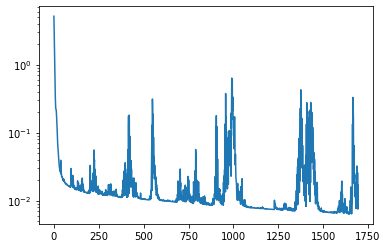

In [15]:
import matplotlib.pyplot as plt
plt.plot(model.loss_curve_[10:])
plt.yscale('log')